## Import the library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading the data


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Check the size and parameter

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Generate heat map and drop the country column

In [6]:
data=df.drop(['CustomerID'],axis=1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


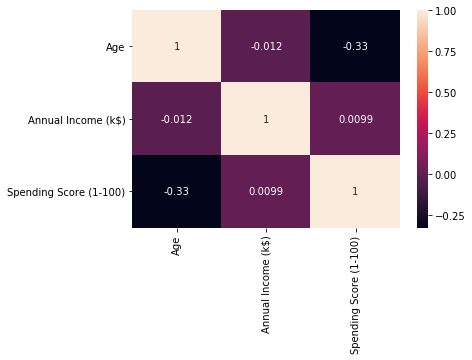

In [8]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True)

## Conclusion of heatmap

<b>Highly Positive Correlation </b>
<oi>
    <li> child_mort and total_fer </li>
    <li>  import and export  </li>
    <li> gdpp and income </li>
    </oi>
    

## Highly negative correlation

 Annual Income and Spending Score

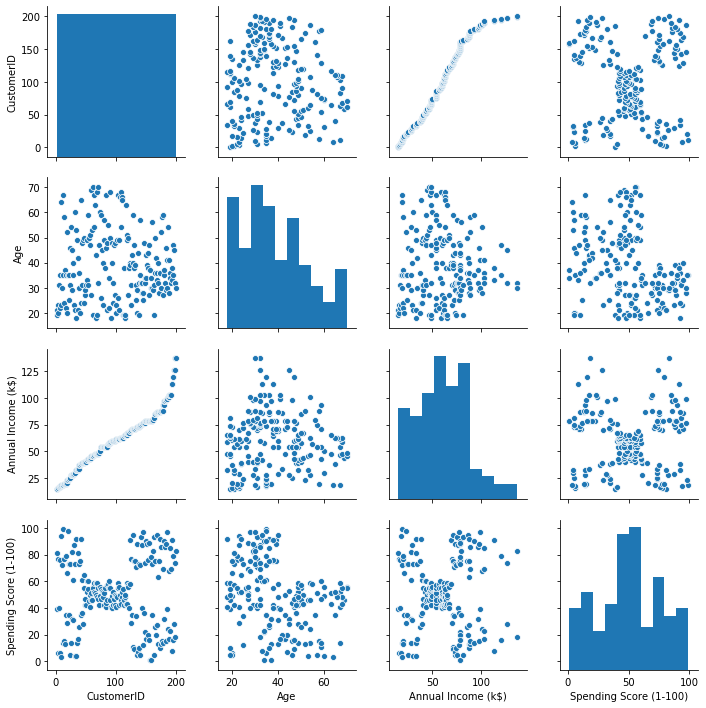

In [17]:
sns.pairplot(df)

## CustomerID is index of the entries. The segmentation analysis will be done based on other features

In [25]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> There is no missing entries </b>

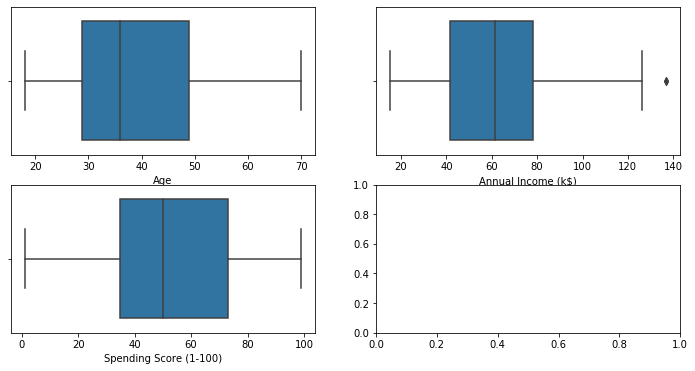

In [27]:
f, axes = plt.subplots(2, 2, figsize=(12,6))

index1 = 0
index2 = 0

for col in list(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.boxplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()

## The median of male and female among age, income and spending features are nearly same.


In [29]:

scaler = StandardScaler()
df2 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df2_scaled= scaler.fit_transform(df2)
df2 = pd.DataFrame(df2_scaled, index=df2.index, columns=df2.columns)
final_df = df[['CustomerID', 'Genre']]
final_df = pd.concat([final_df, df2], axis=1)
final_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


## Segmentation of Age and annual income

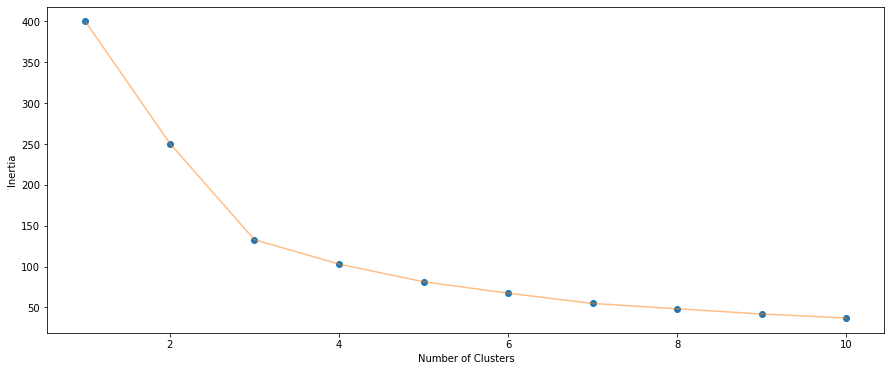

In [30]:
df2 = final_df[['Age', 'Annual Income (k$)']]

inertia = []

for n in range(1, 11):
    df2_auto = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                       tol=0.0001,  random_state= 111  , algorithm='auto')
    df2_auto.fit(df2)
    inertia.append(df2_auto.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [32]:
# 3 number of cluster appears to be optimum choice

df2_auto = KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                       tol=0.0001,  random_state= 111  , algorithm='auto')
df2_auto.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [34]:
df2.head()


,Age,Annual Income (k$),cluster
0,-1.424569,-1.738999,0
1,-1.281035,-1.738999,0
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,0
4,-0.563369,-1.662660,0


# Visualize the distribution of age and income across clusters

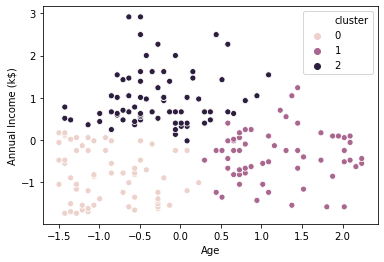

In [35]:

sns.scatterplot(data=df2, x='Age', y='Annual Income (k$)', hue='cluster')
plt.show()

## Segmentation of Age, Income and Spending score

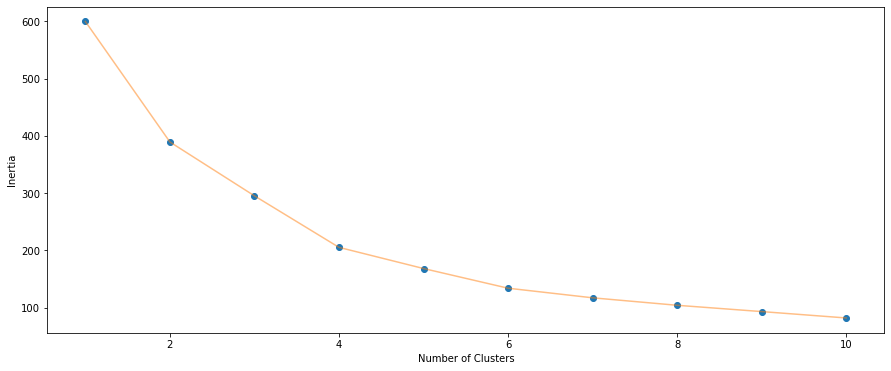

In [37]:
df2 = final_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []

for n in range(1, 11):
    df2_auto = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                       tol=0.0001,  random_state= 111  , algorithm='auto')
    df2_auto.fit(df2)
    inertia.append(df2_auto.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [38]:
# 4 number of cluster appears to be optimum choice

df2_auto = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                       tol=0.0001,  random_state= 111  , algorithm='auto')
df2_auto.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [41]:
df2['color'] = df2['cluster'].map({3:'red', 2:'blue', 1:'green', 0:'yellow'})
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster,color
0,-1.424569,-1.738999,-0.434801,0,yellow
1,-1.281035,-1.738999,1.195704,0,yellow
2,-1.352802,-1.700830,-1.715913,0,yellow
3,-1.137502,-1.700830,1.040418,0,yellow
4,-0.563369,-1.662660,-0.395980,0,yellow
